In [1]:
# Here is a comprehensive import script for time series analysis and forecasting using various libraries that I frequently use.

import os
import sys
import math
import time
import warnings
import random
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

# ---- Data Handling ----
import numpy as np
import pandas as pd

# ---- Visualization ----
import matplotlib.pyplot as plt
import seaborn as sns


# ---- Statistical / Classical Time Series Models ----
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.structural import UnobservedComponents

# ---- Facebook Prophet / NeuralProphet ----
try:
    from prophet import Prophet
except ImportError:
    pass
try:
    from neuralprophet import NeuralProphet
except ImportError:
    pass

# ---- Hidden Markov Models ----
try:
    from hmmlearn import hmm
except ImportError:
    pass

# ---- Machine Learning (Scikit-learn) ----
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import  mean_absolute_error, r2_score

# ---- PyTorch (Deep Learning) ----
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

# ---- PyTorch Deep Models ----
from torch import Tensor
import torch.nn.functional as F

# ---- For Transformers / Attention Models ----
try:
    from torch.nn import Transformer, TransformerEncoder, TransformerEncoderLayer
except ImportError:
    pass

# ---- Advanced Time Series DL Models ----
# (Temporal Convolutional Networks, etc.)
try:
    from torch.nn.utils import weight_norm
except ImportError:
    pass

# ---- Model Comparison & Performance ----
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_absolute_error,
    r2_score
)

# ---- Utility Tools ----
from tqdm import tqdm
from itertools import product
import joblib
import json
import gc

# ---- Optional for Deep Learning Visualization ----
try:
    from torchsummary import summary
except ImportError:
    pass

# ---- Optional: Hyperparameter Optimization ----
try:
    import optuna
except ImportError:
    pass


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


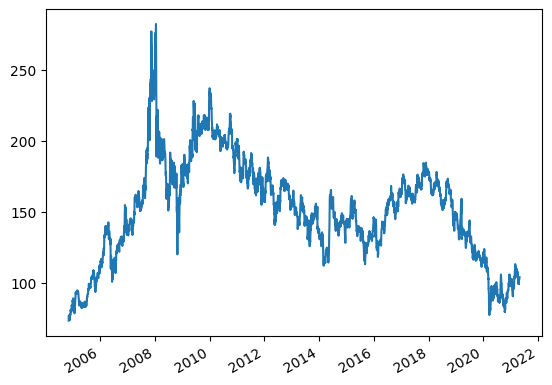

In [16]:
stock_name = 'NTPC'

# load stock file and plot VWAP
df = pd.read_csv('nifty/'+stock_name+'.csv', usecols = ['Date', 'VWAP'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",  inplace=True)
df.VWAP.plot(xlabel = '')
plt.show()

### Classical Forecasting Methods ###

#### Stationarity Check ####

ADF Statistic: -2.2987757249470957
p-value: 0.17236312861898845
Critical Values: {'1%': -3.431961684557061, '5%': -2.862252154011385, '10%': -2.567149086667961}
The series is non-stationary; differencing might be required.


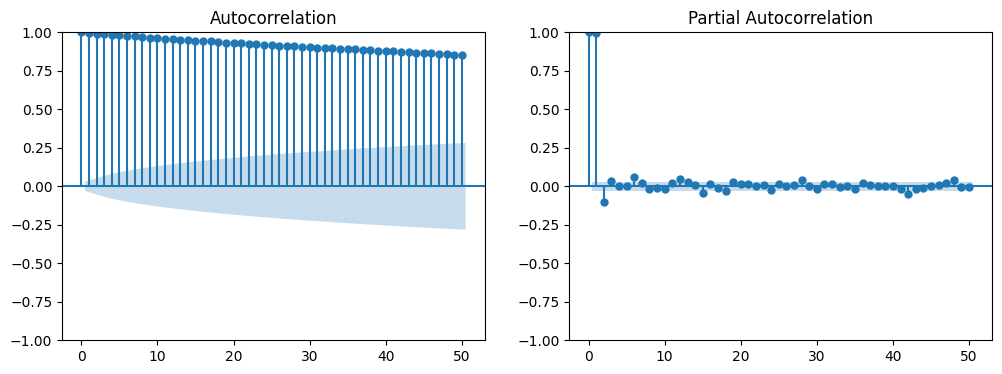

In [17]:
result = adfuller(df['VWAP'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary; differencing might be required.")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['VWAP'], ax=ax[0], lags=50)
plot_pacf(df['VWAP'], ax=ax[1], lags=50)
plt.show()


In [18]:
split_ratio = 0.8
split_point = int(len(df) * split_ratio)
train, test = df[:split_point], df[split_point:]

print("Train size:", len(train))
print("Test size:", len(test))


Train size: 3270
Test size: 818


### Standard Time series Models ###

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - 


Searching best ARIMA parameters...


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - 

Best ARIMA order: (2, 1, 0) with AIC = -17460.12


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)




 Best SARIMA order: (2, 0, 0), Seasonal: (2, 1, 1, 12)


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.fram


--- Evaluation Metrics ---
ARIMA           -> MSE: 3443.799985 | MAE: 51.278814 | MAPE: 0.483135
SARIMA          -> MSE: 2280.191319 | MAE: 40.576943 | MAPE: 0.387562
Holt-Winters    -> MSE: 5368.533011 | MAE: 64.032081 | MAPE: 0.602799
State-Space     -> MSE: 5928.778032 | MAE: 67.199101 | MAPE: 0.632879


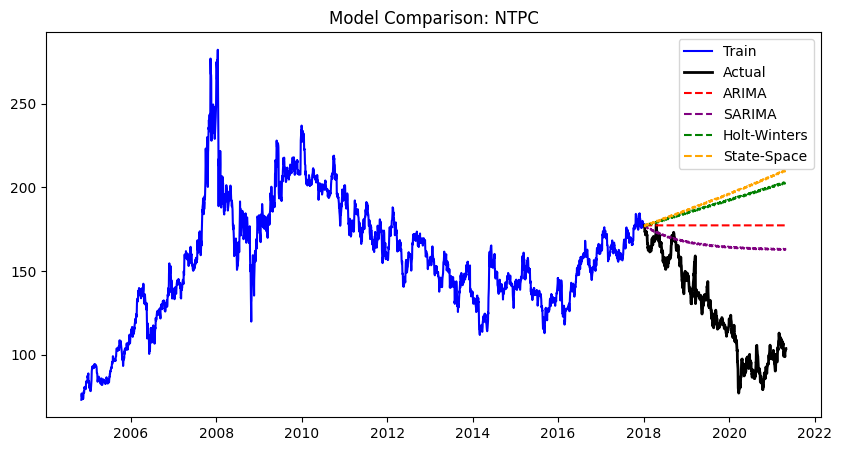


Sample Forecasts:
            Actual       ARIMA      SARIMA  Holt_Winters  State_Space
Date                                                                 
2018-01-08  177.27  177.282437  177.331941    177.419023   177.371555
2018-01-09  177.11  177.284298  177.247575    177.280048   177.349674
2018-01-10  175.00  177.281055  176.966162    177.137923   177.175064
2018-01-11  173.68  177.280513  176.972012    177.203139   177.244266
2018-01-12  173.27  177.280594  176.794004    177.172331   177.173829


In [19]:
import itertools

y_train = np.log(train['VWAP'])
y_test = np.log(test['VWAP'])


p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

print("\nSearching best ARIMA parameters...")

# Here I am performing a grid search over ARIMA parameters (p, d, q) to find the best model based on AIC criterion

for order in pdq:
    try:
        model = ARIMA(y_train, order=order)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
            best_model = result
    except:
        continue

arima_forecast = np.exp(best_model.forecast(steps=len(test)))


print(f"Best ARIMA order: {best_order} with AIC = {best_aic:.2f}")
 

# SARIMA Grid Search (AIC-based again)

from pmdarima import auto_arima



# Automatically determines p,d,q,P,D,Q with AIC-based stepwise search
sarima_auto = auto_arima(
    y_train,
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    seasonal=True,
    m=12,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None,
    D=1,
    trace=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
       

print(f"\n Best SARIMA order: {sarima_auto.order}, Seasonal: {sarima_auto.seasonal_order}")

# Fit best model
sarima_result = SARIMAX(
    y_train,
    order=sarima_auto.order,
    seasonal_order=sarima_auto.seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

sarima_forecast = np.exp(sarima_result.forecast(steps=len(test)))




# ARIMA
arima_result = best_model
arima_forecast = np.exp(arima_result.forecast(steps=len(test)))

# SARIMA
sarima_result = sarima_result
sarima_forecast = np.exp(sarima_result.forecast(steps=len(test)))

# Holt-Winters (Exponential Smoothing)

hw_model = ExponentialSmoothing(train['VWAP'],
                                trend='add',
                                seasonal='mul',
                                seasonal_periods=12,
)
hw_result = hw_model.fit()
hw_forecast = hw_result.forecast(steps=len(test))

# State-Space Model
ucm_model = UnobservedComponents(
    y_train,
    level='local linear trend',
    seasonal=12,
    stochastic_level=True,
    stochastic_seasonal=True
)
ucm_result = ucm_model.fit()
ucm_forecast = np.exp(ucm_result.forecast(steps=len(test)))

#Evaluate Forecasts

def evaluate_forecast(true, pred, name):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    mape = mean_absolute_percentage_error(true, pred)
    print(f"{name:<15} -> MSE: {mse:.6f} | MAE: {mae:.6f} | MAPE: {mape:.6f}")

print("\n--- Evaluation Metrics ---")
evaluate_forecast(test['VWAP'], arima_forecast, "ARIMA")
evaluate_forecast(test['VWAP'], sarima_forecast, "SARIMA")
evaluate_forecast(test['VWAP'], hw_forecast, "Holt-Winters")
evaluate_forecast(test['VWAP'], ucm_forecast, "State-Space")


#Plot All Forecasts

plt.figure(figsize=(10, 5))
plt.plot(train.index, train['VWAP'], label='Train', color='blue')
plt.plot(test.index, test['VWAP'], label='Actual', color='black', linewidth=2)
plt.plot(test.index, arima_forecast, label='ARIMA', color='red', linestyle='--')
plt.plot(test.index, sarima_forecast, label='SARIMA', color='purple', linestyle='--')
plt.plot(test.index, hw_forecast, label='Holt-Winters', color='green', linestyle='--')
plt.plot(test.index, ucm_forecast, label='State-Space', color='orange', linestyle='--')
plt.legend()
plt.title(f'Model Comparison: {stock_name}')
plt.xlabel('')
plt.show()

# Display Sample Forecasts

forecasts_df = pd.DataFrame({
    'Actual': test['VWAP'].values,
    'ARIMA': arima_forecast.values,
    'SARIMA': sarima_forecast.values,
    'Holt_Winters': hw_forecast.values,
    'State_Space': ucm_forecast.values
}, index=test.index)

print("\nSample Forecasts:")
print(forecasts_df.head())

### Random Forest and Gradient Boosting Approach ###

In [5]:
def make_supervised(data, lag=5):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lag = 5

#scale the data

scaler = StandardScaler()
df['VWAP'] = scaler.fit_transform(df[['VWAP']])

values = df['VWAP'].values

X, y = make_supervised(values, lag)


split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

# Grid search
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print(f"RF best params: {rf_grid.best_params_}")


RF best params: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
}

gbr_grid = GridSearchCV(gbr, gbr_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
gbr_grid.fit(X_train, y_train)

gbr_best = gbr_grid.best_estimator_
y_pred_gbr = gbr_best.predict(X_test)

print(f"GBR best params: {gbr_grid.best_params_}")


GBR best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Random Forest → RMSE: 0.0605, MAE: 0.0429, R²: 0.9942
Gradient Boosting → RMSE: 0.0600, MAE: 0.0422, R²: 0.9943


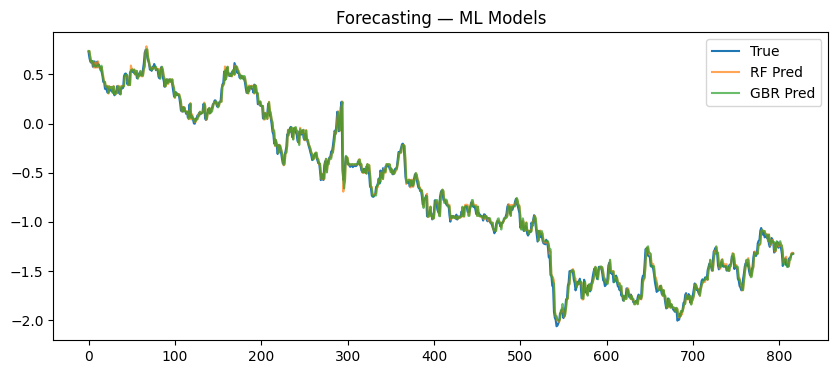

In [9]:
def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_gbr, "Gradient Boosting")

plt.figure(figsize=(10,4))
plt.plot(y_test, label='True')
plt.plot(y_pred_rf, label='RF Pred', alpha=0.7)
plt.plot(y_pred_gbr, label='GBR Pred', alpha=0.7)
plt.legend()
plt.title("Forecasting — ML Models")
plt.show()


### Deep learning models ###

In [10]:
def make_supervised(data, lag=30):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lag = 30
values = df['VWAP'].values
X, y = make_supervised(values, lag)

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
X_test_t  = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)
y_test_t  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)

In [11]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(TimeSeriesDataset(X_train_t, y_train_t), batch_size=32, shuffle=True)
test_loader = DataLoader(TimeSeriesDataset(X_test_t, y_test_t), batch_size=32, shuffle=False)


In [12]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=1):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


In [13]:
class GRUModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=1):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out


In [14]:
class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, padding):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride,
                              padding=padding, dilation=dilation)
        self.relu = nn.ReLU()
        self.net = nn.Sequential(self.conv, self.relu)
    def forward(self, x):
        return self.net(x)

class TCNModel(nn.Module):
    def __init__(self, input_dim=1, num_channels=[32, 64], kernel_size=3, output_dim=1):
        super().__init__()
        layers = []
        for i in range(len(num_channels)):
            dilation = 2 ** i
            in_ch = input_dim if i == 0 else num_channels[i-1]
            out_ch = num_channels[i]
            padding = (kernel_size - 1) * dilation
            layers.append(TemporalBlock(in_ch, out_ch, kernel_size, stride=1,
                                        dilation=dilation, padding=padding))
        self.network = nn.Sequential(*layers)
        self.fc = nn.Linear(num_channels[-1], output_dim)
    def forward(self, x):
        x = x.transpose(1, 2)
        out = self.network(x)
        out = out[:, :, -1]
        return self.fc(out)


In [73]:
def train_model(model, train_loader, test_loader, epochs=30, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
        if (epoch+1)%5==0:
            model.eval()
            test_loss = 0
            with torch.no_grad():
                for X_batch, y_batch in test_loader:
                    pred = model(X_batch)
                    test_loss += criterion(pred, y_batch).item()
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.6f} | Test Loss: {test_loss/len(test_loader):.6f}")


In [ ]:
lstm_model = LSTMModel()
gru_model  = GRUModel()
tcn_model  = TCNModel()

print("Training LSTM...")
train_model(lstm_model, train_loader, test_loader, epochs=30)

print("Training GRU...")
train_model(gru_model, train_loader, test_loader, epochs=30)

print("Training TCN...")
train_model(tcn_model, train_loader, test_loader, epochs=30)



🔹 Training LSTM...
Epoch 5/30 | Train Loss: 0.000622 | Test Loss: 0.000340
Epoch 10/30 | Train Loss: 0.000630 | Test Loss: 0.000274
Epoch 15/30 | Train Loss: 0.000314 | Test Loss: 0.000240
Epoch 20/30 | Train Loss: 0.000631 | Test Loss: 0.000190
Epoch 25/30 | Train Loss: 0.000452 | Test Loss: 0.000122
Epoch 30/30 | Train Loss: 0.000643 | Test Loss: 0.000301

🔹 Training GRU...
Epoch 5/30 | Train Loss: 0.000131 | Test Loss: 0.000159
Epoch 10/30 | Train Loss: 0.000176 | Test Loss: 0.000125
Epoch 15/30 | Train Loss: 0.000287 | Test Loss: 0.000118
Epoch 20/30 | Train Loss: 0.000064 | Test Loss: 0.000144
Epoch 25/30 | Train Loss: 0.000184 | Test Loss: 0.000095
Epoch 30/30 | Train Loss: 0.000260 | Test Loss: 0.000109

🔹 Training TCN...
Epoch 5/30 | Train Loss: 0.000486 | Test Loss: 0.000123
Epoch 10/30 | Train Loss: 0.000128 | Test Loss: 0.000094
Epoch 15/30 | Train Loss: 0.000282 | Test Loss: 0.000116
Epoch 20/30 | Train Loss: 0.000244 | Test Loss: 0.000091
Epoch 25/30 | Train Loss: 0.00025

LSTM RMSE: 0.0174


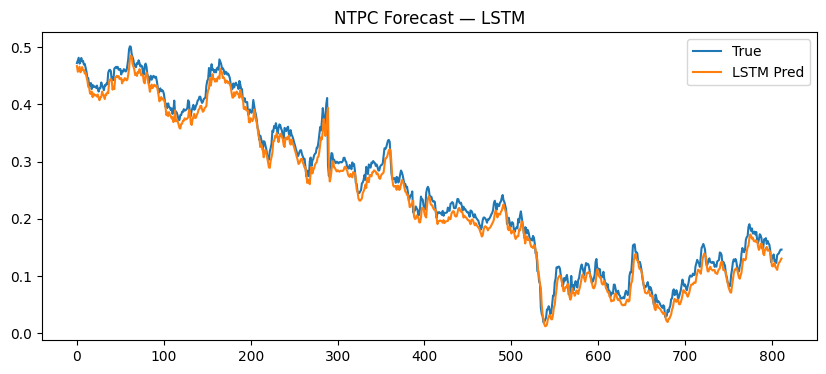

GRU RMSE: 0.0105


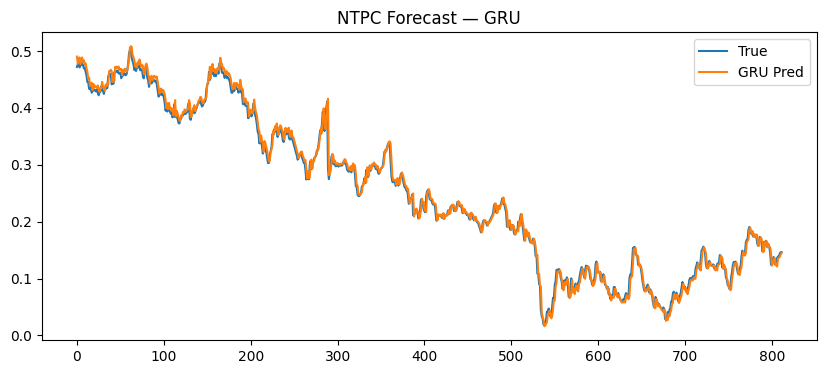

TCN RMSE: 0.0101


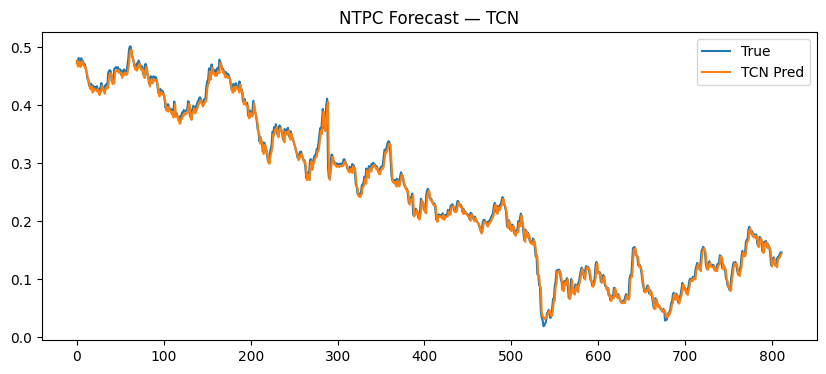

In [83]:
def evaluate_model(model, X_test_t, y_test_t, name):
    model.eval()
    with torch.no_grad():
        X = X_test_t
        if isinstance(X, np.ndarray):
            X = torch.tensor(X, dtype=torch.float32)
        if X.dim() == 2:
            X = X.unsqueeze(-1).float()
        else:
            X = X.float()

        out = model(X)
        preds = out.cpu().numpy().flatten()

        if isinstance(y_test_t, torch.Tensor):
            true = y_test_t.cpu().numpy().flatten()
        elif isinstance(y_test_t, np.ndarray):
            true = y_test_t.flatten()
        else:
            true = np.array(y_test_t).flatten()

    rmse = np.sqrt(np.mean((preds - true)**2))
    print(f"{name} RMSE: {rmse:.4f}")

    plt.figure(figsize=(10,4))
    plt.plot(true, label='True')
    plt.plot(preds, label=f'{name} Pred')
    plt.title(f'{stock_name} Forecast — {name}')
    plt.legend()
    plt.show()


evaluate_model(lstm_model, X_test_t, y_test_t, "LSTM")
evaluate_model(gru_model, X_test_t, y_test_t, "GRU")
evaluate_model(tcn_model, X_test_t, y_test_t, "TCN")


### Transformer Based Approach ###

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

data = df['VWAP'].values
window_size = 30

def create_sequences(data, window):
    xs, ys = [], []
    for i in range(len(data) - window):
        xs.append(data[i:i+window])
        ys.append(data[i+window])
    return np.array(xs), np.array(ys)

scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()


X, y = create_sequences(data, window_size)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=32, shuffle=False)


In [26]:
class Transformer(nn.Module):
    def __init__(self, input_size=1, d_model=32, num_heads=2, num_layers=2, dim_feedforward=64, dropout=0.2):
        super().__init__()
        self.input_projection = nn.Linear(input_size, d_model)
        
        self.positional_encoding = self._positional_encoding(5000, d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=num_heads, 
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(d_model, 1)
        self.dropout = nn.Dropout(dropout)
        self.norm = nn.LayerNorm(d_model)

    def _positional_encoding(self, max_len, d_model):
        pos = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(pos * div_term)
        pe[:, 1::2] = torch.cos(pos * div_term)
        return pe.unsqueeze(0)  

    def forward(self, x):
        x = x.unsqueeze(-1)
        x = self.input_projection(x) + self.positional_encoding[:, :x.size(1), :]
        x = self.norm(x)
        x = self.transformer(x)
        x = self.dropout(x)
        out = self.fc_out(x[:, -1, :])
        return out


In [27]:
model = Transformer()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(30):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/30], Loss: {total_loss/len(train_loader):.6f}")

Epoch [1/30], Loss: 0.148492
Epoch [2/30], Loss: 0.046305
Epoch [3/30], Loss: 0.042135
Epoch [4/30], Loss: 0.033523
Epoch [5/30], Loss: 0.033518
Epoch [6/30], Loss: 0.031582
Epoch [7/30], Loss: 0.029026
Epoch [8/30], Loss: 0.028469
Epoch [9/30], Loss: 0.028632
Epoch [10/30], Loss: 0.024911
Epoch [11/30], Loss: 0.025706
Epoch [12/30], Loss: 0.026963
Epoch [13/30], Loss: 0.027411
Epoch [14/30], Loss: 0.026643
Epoch [15/30], Loss: 0.025391
Epoch [16/30], Loss: 0.023876
Epoch [17/30], Loss: 0.023095
Epoch [18/30], Loss: 0.022778
Epoch [19/30], Loss: 0.022479
Epoch [20/30], Loss: 0.023470
Epoch [21/30], Loss: 0.022851
Epoch [22/30], Loss: 0.021339
Epoch [23/30], Loss: 0.022062
Epoch [24/30], Loss: 0.020949
Epoch [25/30], Loss: 0.022364
Epoch [26/30], Loss: 0.021661
Epoch [27/30], Loss: 0.021383
Epoch [28/30], Loss: 0.020094
Epoch [29/30], Loss: 0.022257
Epoch [30/30], Loss: 0.021461


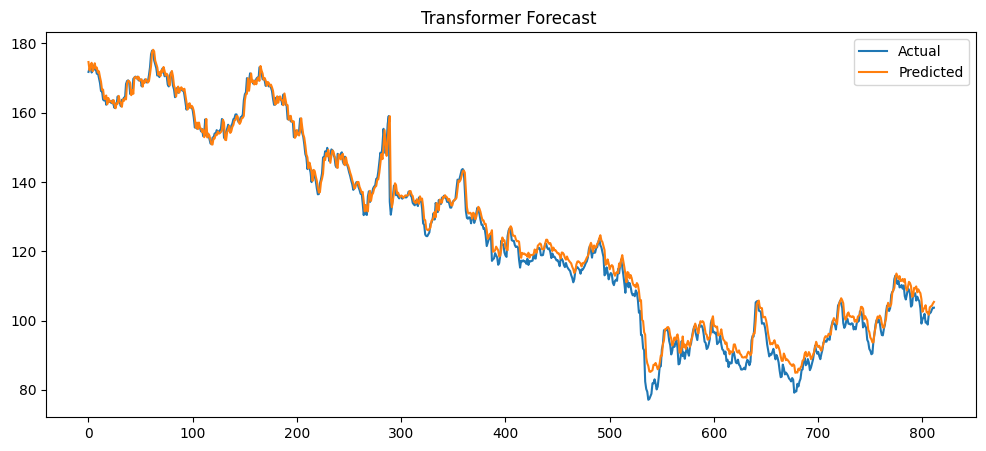

In [28]:
model.eval()
preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        output = model(X_batch)
        preds.extend(output.squeeze().tolist())

preds = np.array(preds)

# Inverse transform
inv_preds = scaler.inverse_transform(preds.reshape(-1, 1))
inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12,5))
plt.plot(inv_y_test, label='Actual')
plt.plot(inv_preds, label='Predicted')
plt.title("Transformer Forecast ")
plt.legend()
plt.show()
